In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
ch = pd.read_csv("churn.csv")
#importing the train and test file
pd.set_option('display.max_columns', None)
ch

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# we can drop 'customerID' as each id is unique
ch.drop('customerID',axis=1,inplace=True)

In [4]:
ch.isnull().sum(),ch.isna().sum() # checking for null values

(gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64)

we can see that there are no null values in the dataset

In [5]:
ch['Churn'].unique() #Target variable

array(['No', 'Yes'], dtype=object)

The target variable is Churn, and we can see that it has only 2 values (Yes and No). Therefore, this is a classification problem

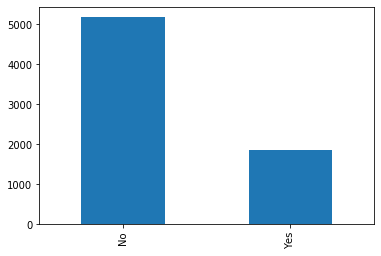

In [6]:
ch['Churn'].value_counts().plot.bar()
plt.show()

we can see that maximum churn is no

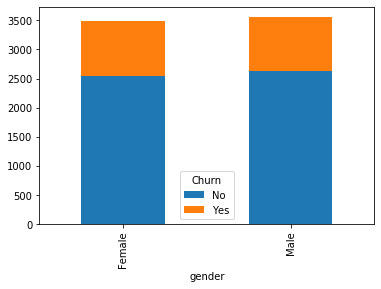

In [7]:
pd.crosstab(ch['gender'], ch['Churn']).plot(kind='bar', stacked=True)
plt.show()

we can see that churn based on gender is almost same

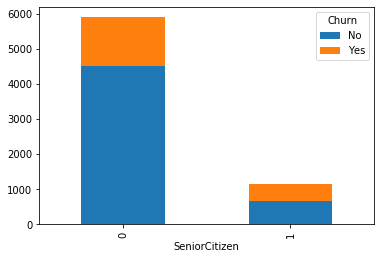

In [8]:
pd.crosstab(ch['SeniorCitizen'], ch['Churn']).plot(kind='bar', stacked=True)
plt.show()

we can see that churn is higher if it is a seniorcitizen

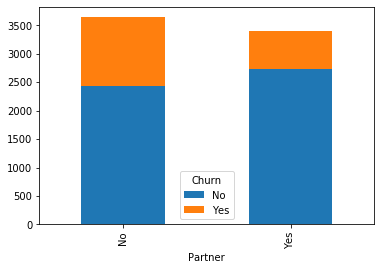

In [9]:
pd.crosstab(ch['Partner'], ch['Churn']).plot(kind='bar', stacked=True)
plt.show()

Chances of Churn is lower if there is a partner

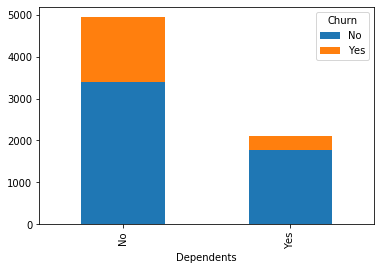

In [10]:
pd.crosstab(ch['Dependents'], ch['Churn']).plot(kind='bar', stacked=True)
plt.show()

chances of churn is lower if there are dependents

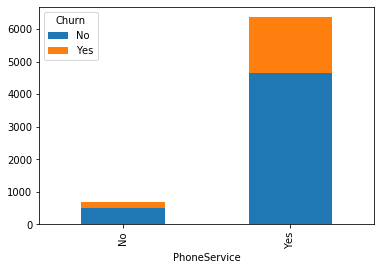

In [11]:
pd.crosstab(ch['PhoneService'], ch['Churn']).plot(kind='bar', stacked=True)
plt.show()

chances of churn is higher with phone service

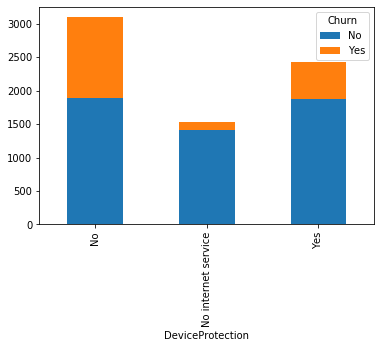

In [12]:
pd.crosstab(ch['DeviceProtection'], ch['Churn']).plot(kind='bar', stacked=True)
plt.show()

chances of churn is higher with no DeviceProtection



In [13]:
ch.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

we can see maximum of the variables are in Object data form. we have to convert them to numerical form

# Label Encoding

Converting Categorical Variables to numerical

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']:
    ch[i]=label.fit_transform(ch[i])


In [15]:
ch.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
ch.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

we can see that the 'TotalCharges' is in object data type. We need to convert it into numerical

In [17]:
ch.loc[ch['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,,0


we can see that there are few empty values in 'TotalCharges'

we can drop those rows with empty values in 'TotalCharges' as it woll not effect our dataset

In [18]:
ch.drop(ch.loc[ch['TotalCharges']== ' '].index, inplace=True)

In [19]:
ch.loc[ch['TotalCharges'] == ' '] #rows with empty values in 'TotalCharges' are dropped

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
ch['TotalCharges'] = pd.to_numeric(ch['TotalCharges']) #converting from object data type to int data type from

In [21]:
ch.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


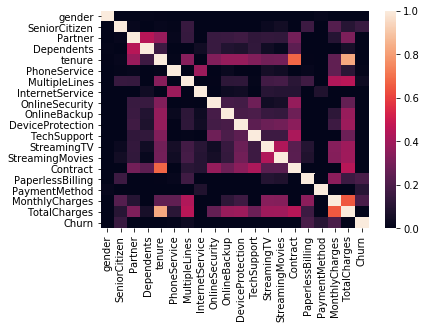

In [22]:
sns.heatmap(ch.corr(), vmin=0, vmax=1)


In [23]:
ch.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


we can see that correlation between independent variables is low(i.e. <0.7). We are good to go 

In [24]:
ch.corr()["Churn"].sort_values(ascending=False) 
#identifying important features with target varible

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

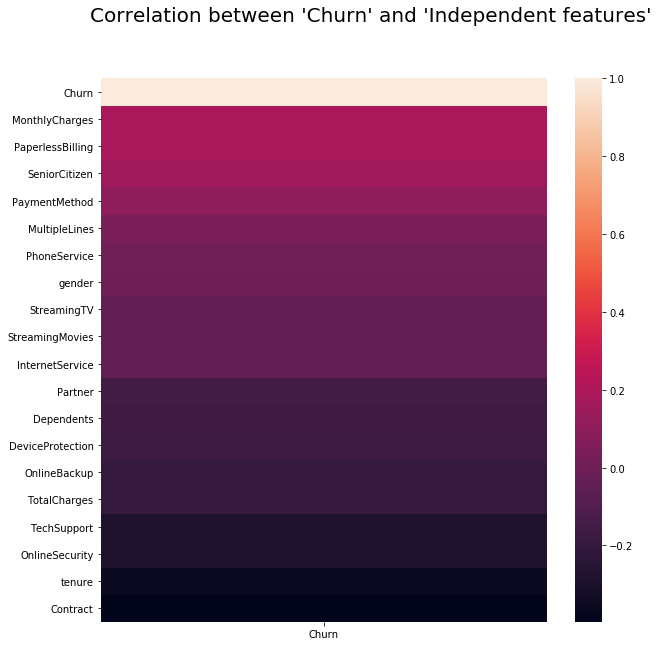

In [25]:
corr, b = plt.subplots(figsize=(10,10))
corr.suptitle("Correlation between 'Churn' and 'Independent features'",fontsize=20)
b=sns.heatmap(ch.corr()[["Churn"]].sort_values("Churn"));
b.invert_yaxis()
#important features

We can see that important features in descending order above

# Splitting of train data into Independent and Target variables

In [26]:
ind=ch.drop("Churn",axis=1)
tar=ch["Churn"]
#splitting individual and target variable in ind and tar

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#splitting into training and testing data set
ind_train,ind_test,tar_train,tar_test=train_test_split(ind,tar,test_size=.22,random_state=43)
print(ind_train.shape)
print(ind_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(5484, 19)
(1548, 19)
(5484,)
(1548,)


# Data Modeling and prediciton

In [29]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import PowerTransformer
from  sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [30]:
# LogisticRegression, GaussianNB, Supportvectorclassifier, RandomForestClassifier, AdaBoostClassifier,DecisionTreeClassifier
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier()


In [31]:
model=[lg,gnb,sv,rf,ad,knn,dtc]

for m in model:
    m.fit(ind_train,tar_train)
    predict=m.predict(ind_test)
    print('accuracy score of:',m)
    print(accuracy_score(tar_test,predict))
    print(confusion_matrix(tar_test,predict))
    print(classification_report(tar_test,predict))
    score=cross_val_score(m,ind,tar,cv=5)
    print(score)
    print(score.mean())

accuracy score of: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7926356589147286
[[998 126]
 [195 229]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1124
           1       0.65      0.54      0.59       424

    accuracy                           0.79      1548
   macro avg       0.74      0.71      0.72      1548
weighted avg       0.78      0.79      0.79      1548

[0.80241649 0.80170576 0.78876245 0.80654339 0.8029872 ]
0.8004830551570536
accuracy score of: GaussianNB(priors=None, var_smoothing=1e-09)
0.7538759689922481
[[864 260]
 [121 303]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      

In [32]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
a=[]
acc=[]
strd=[]
classifiers=['lg','gnb','sv','rf','ad','knn','dtc']
models=[lg,gnb,sv,rf,ad,knn,dtc]
for i in models:
    model = i
    cv_result = cross_val_score(model,ind,tar, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    a.append(cv_result.mean())
    strd.append(cv_result.std())
    acc.append(cv_result)
nd=pd.DataFrame({'CV Mean':a,'Std':strd},index=classifiers)       
nd

,CV Mean,Std
lg,0.798067,0.009610
gnb,0.752276,0.010032
sv,0.734215,0.012067
rf,0.793939,0.013933
ad,0.800765,0.014008
knn,0.762941,0.010509
dtc,0.738341,0.014897


According to Cross val score and accuracy we can see that the RandomForesrClassifer has the least difference between Accuracy and Cross val score, therefore we select RandomForesrClassifer model.

To get the best parameters and best results we use GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
gs=GridSearchCV(rf,parameters)
gs.fit(ind_train,tar_train)

sorted(gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [35]:
print(gs.best_params_)
best_result=gs.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
0.8045209562908797


We can see that the accuracy score has increased.

# AUC ROC CURVE

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [37]:
y_pred_prob=rf.predict_proba(ind_test)[:,1]

In [38]:
y_pred_prob


array([0.3 , 0.95, 0.06, ..., 0.48, 0.78, 0.06])

In [39]:
fpr,tpr,thresholds=roc_curve(tar_test,y_pred_prob)

In [40]:
aur_score=roc_auc_score(tar_test,lg.predict(ind_test))

In [41]:
aur_score # AUC ROC score

0.7139973477472638

we can also see that the AUC score is good

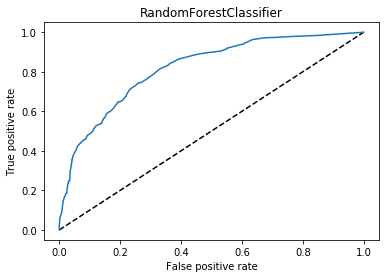

In [42]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("RandomForestClassifier")
plt.show()

we can see that the area falls under True Positive Rate

Therefore, we can save this model

In [43]:
import joblib
joblib.dump(rf,'Customer Churn Analysis.obj') #save the model as object file


['Customer Churn Analysis.obj']